<a href="https://colab.research.google.com/github/rohitashwachaks/advanced_optimisation/blob/main/Assignments/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework-1

rc47878

In [4]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt


In [70]:
def gray2bw(arr: np.array, threshold: int = 0.8):
  return np.where(arr > threshold, 1, 0)

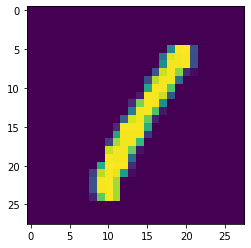

(28, 28)


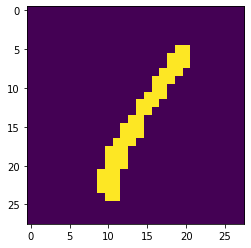

In [71]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

img = x_train[3]
plt.imshow(img)
plt.show()

x_train = gray2bw(x_train)
x_test = gray2bw(x_test)

print(img.shape)
img = x_train[3]
plt.imshow(img)

ndata_train = x_train.shape[0]
ndata_test = x_test.shape[0]


In [35]:
x_train = x_train.reshape((ndata_train,28,28,1))
x_test = x_test.reshape((ndata_test,28,28,1))
xshape = x_train.shape[1:4]

In [36]:
NNmodel = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=xshape),
        tf.keras.layers.Dense(64,activation=tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l1(0.0002)),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(64,activation=tf.nn.sigmoid),
        tf.keras.layers.Dense(10,activation=tf.nn.softmax)
        ])

In [37]:
NNmodel.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

NNmodel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [38]:
NNmodel.fit(x_train,y_train,epochs=12,validation_split=0.2,batch_size=200)

Epoch 1/12
240/240 [==============================] - 2s 5ms/step - loss: 1.1515 - accuracy: 0.7793 - val_loss: 0.5943 - val_accuracy: 0.8986
Epoch 2/12
240/240 [==============================] - 1s 5ms/step - loss: 0.5610 - accuracy: 0.8946 - val_loss: 0.4565 - val_accuracy: 0.9196
Epoch 3/12
240/240 [==============================] - 1s 5ms/step - loss: 0.4587 - accuracy: 0.9136 - val_loss: 0.3955 - val_accuracy: 0.9285
Epoch 4/12
240/240 [==============================] - 1s 5ms/step - loss: 0.4004 - accuracy: 0.9250 - val_loss: 0.3570 - val_accuracy: 0.9362
Epoch 5/12
240/240 [==============================] - 1s 4ms/step - loss: 0.3627 - accuracy: 0.9330 - val_loss: 0.3194 - val_accuracy: 0.9458
Epoch 6/12
240/240 [==============================] - 1s 5ms/step - loss: 0.3322 - accuracy: 0.9403 - val_loss: 0.3028 - val_accuracy: 0.9482
Epoch 7/12
240/240 [==============================] - 1s 5ms/step - loss: 0.3082 - accuracy: 0.9459 - val_loss: 0.2786 - val_accuracy: 0.9563
Epoch 

In [39]:
print('This model predicts '+str(NNmodel.evaluate(x_test,y_test)[1]*100) +'% of the test data correctly')

313/313 [==============================] - 1s 4ms/step - loss: 0.2358 - accuracy: 0.9607
This model predicts 96.069997549057% of the test data correctly


In [40]:
pred_probs = NNmodel.predict(x_test)
pred_probs.shape

(10000, 10)

In [43]:
print(np.sum(pred_probs[0,:]))
pred_probs[0,:]

0.99999994


array([4.0419349e-05, 1.6225516e-05, 2.9009272e-04, 3.3876204e-04,
       2.4907088e-06, 9.2496939e-06, 5.7418799e-08, 9.9892235e-01,
       6.2098206e-06, 3.7410620e-04], dtype=float32)

In [44]:
pred_class = np.argmax(pred_probs, axis=1)
np.mean(pred_class==y_test)

0.9607

In [45]:
NNmodel2 = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(filters=10,kernel_size=(5,5),activation=tf.nn.relu,input_shape=xshape),
        tf.keras.layers.Conv2D(filters=10,kernel_size=(5,5),activation=tf.nn.relu,input_shape=xshape),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2),strides=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128,activation=tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l1(0.0002)),
        tf.keras.layers.Dense(64,activation=tf.nn.softplus,kernel_regularizer = tf.keras.regularizers.l1(0.0005)),
        tf.keras.layers.Dense(10,activation=tf.nn.softmax)
        ])

In [46]:
NNmodel2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

NNmodel2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 10)        260       
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 10)        2510      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 10)       0         
 )                                                               
                                                                 
 flatten_2 (Flatten)         (None, 1000)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               128128    
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                      

In [48]:
NNmodel2.fit(x_train,y_train,epochs=200,validation_split=0.3,batch_size=500)

Epoch 1/20
84/84 [==============================] - 2s 26ms/step - loss: 1.7164 - accuracy: 0.7715 - val_loss: 1.0226 - val_accuracy: 0.9193
Epoch 2/20
84/84 [==============================] - 2s 25ms/step - loss: 0.8786 - accuracy: 0.9348 - val_loss: 0.7588 - val_accuracy: 0.9487
Epoch 3/20
84/84 [==============================] - 2s 22ms/step - loss: 0.6772 - accuracy: 0.9573 - val_loss: 0.6174 - val_accuracy: 0.9610
Epoch 4/20
84/84 [==============================] - 2s 25ms/step - loss: 0.5666 - accuracy: 0.9639 - val_loss: 0.5313 - val_accuracy: 0.9652
Epoch 5/20
84/84 [==============================] - 2s 24ms/step - loss: 0.4889 - accuracy: 0.9691 - val_loss: 0.4569 - val_accuracy: 0.9704
Epoch 6/20
84/84 [==============================] - 2s 21ms/step - loss: 0.4286 - accuracy: 0.9727 - val_loss: 0.4187 - val_accuracy: 0.9690
Epoch 7/20
84/84 [==============================] - 2s 23ms/step - loss: 0.3883 - accuracy: 0.9730 - val_loss: 0.3873 - val_accuracy: 0.9683
Epoch 8/20
84

In [ ]:
pred_probs2 = NNmodel2.predict(x_test)
pred2 = np.argmax(pred_probs2, axis=1)
print(np.mean(pred2==y_test))

0.8843


In [74]:
NNmodel2 = tf.keras.models.Sequential()
NNmodel2.add(tf.keras.layers.Conv2D(filters=10,kernel_size=(3,3),activation=tf.nn.relu,input_shape=xshape))
NNmodel2.add(tf.keras.layers.Conv2D(filters=10,kernel_size=(3,3),activation=tf.nn.relu,input_shape=xshape))
# NNmodel2.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2),strides=2))

NNmodel2.add(tf.keras.layers.Conv2D(filters=5,kernel_size=(3,3),activation=tf.nn.relu,input_shape=xshape))
# NNmodel2.add(tf.keras.layers.Conv2D(filters=10,kernel_size=(3,3),activation=tf.nn.relu,input_shape=xshape))
NNmodel2.add(tf.keras.layers.MaxPooling2D(pool_size = (3,3),strides=3))

NNmodel2.add(tf.keras.layers.Flatten())
# NNmodel2.add(tf.keras.layers.Dense(256,activation=tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l1(0.0002)))
NNmodel2.add(tf.keras.layers.Dense(128,activation=tf.nn.relu,kernel_regularizer = tf.keras.regularizers.l1(0.0002)))
# NNmodel2.add(tf.keras.layers.Dense(64,activation=tf.nn.softplus,kernel_regularizer = tf.keras.regularizers.l1(0.0005)))
NNmodel2.add(tf.keras.layers.Dense(32,activation=tf.nn.softmax))
NNmodel2.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

In [75]:
NNmodel2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

NNmodel2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 26, 26, 10)        100       
                                                                 
 conv2d_25 (Conv2D)          (None, 24, 24, 10)        910       
                                                                 
 conv2d_26 (Conv2D)          (None, 22, 22, 5)         455       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 7, 7, 5)          0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 245)               0         
                                                                 
 dense_36 (Dense)            (None, 128)               31488     
                                                     

In [ ]:
history = NNmodel2.fit(x_train,y_train,epochs=75,validation_split=0.2,batch_size=500)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Epoch 1/75
96/96 [==============================] - 3s 28ms/step - loss: 2.3496 - accuracy: 0.3984 - val_loss: 2.0620 - val_accuracy: 0.6422
Epoch 2/75
96/96 [==============================] - 2s 25ms/step - loss: 1.9533 - accuracy: 0.6551 - val_loss: 1.8516 - val_accuracy: 0.6692
Epoch 3/75
96/96 [==============================] - 2s 23ms/step - loss: 1.7806 - accuracy: 0.6762 - val_loss: 1.6996 - val_accuracy: 0.6760
Epoch 4/75
96/96 [==============================] - 2s 25ms/step - loss: 1.6372 - accuracy: 0.6885 - val_loss: 1.5650 - val_accuracy: 0.6878
Epoch 5/75
96/96 [==============================] - 2s 25ms/step - loss: 1.5102 - accuracy: 0.6917 - val_loss: 1.4527 - val_accuracy: 0.6931
Epoch 6/75
96/96 [==============================] - 2s 25ms/step - loss: 1.4026 - accuracy: 0.6992 - val_loss: 1.3453 - val_accuracy: 0.7377
Epoch 7/75
96/96 [==============================] - 2s 24ms/step - loss: 1.2993 - accuracy: 0.7756 - val_loss: 1.2443 - val_accuracy: 0.8305
Epoch 8/75
96

In [69]:
pred_probs2 = NNmodel2.predict(x_test)
pred2 = np.argmax(pred_probs2, axis=1)
print(np.mean(pred2==y_test))

0.9819


## Functional API
we will need this eventually when we do reinforcement learning

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Input

In [ ]:
imp = Input(shape=xshape)
mid = Conv2D(16,(8,8),strides=4,activation='relu')(imp)
mid = Conv2D(32,(4,4),strides=2,activation='relu')(mid)
mid = Flatten()(mid)
mid = Dense(256,activation='relu')(mid)
out0 = Dense(10,activation='softmax')(mid)
model = Model(imp,out0)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 6, 6, 16)          1040      
                                                                 
 conv2d_1 (Conv2D)           (None, 2, 2, 32)          8224      
                                                                 
 flatten_1 (Flatten)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 256)               33024     
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                                 
Total params: 44,858
Trainable params: 44,858
Non-trainable p